<a href="https://colab.research.google.com/github/mikazz/BashSnippets/blob/master/NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

## Downloading and loading the MNIST dataset 

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


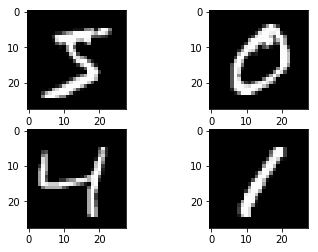

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## Baseline Model with Multi-Layer Perceptrons

In [5]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data using Keras helper function
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# Build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

W0708 13:12:20.465614 140484190648192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 13:12:20.503617 140484190648192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 13:12:20.510766 140484190648192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0708 13:12:20.544599 140484190648192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 13:12:20.572925 140484190648192 deprecation_wrapper.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2811 - acc: 0.9207 - val_loss: 0.1417 - val_acc: 0.9569
Epoch 2/10
 - 6s - loss: 0.1117 - acc: 0.9675 - val_loss: 0.0919 - val_acc: 0.9711
Epoch 3/10
 - 6s - loss: 0.0716 - acc: 0.9797 - val_loss: 0.0782 - val_acc: 0.9776
Epoch 4/10
 - 5s - loss: 0.0503 - acc: 0.9858 - val_loss: 0.0749 - val_acc: 0.9765
Epoch 5/10
 - 5s - loss: 0.0375 - acc: 0.9892 - val_loss: 0.0672 - val_acc: 0.9793
Epoch 6/10
 - 6s - loss: 0.0271 - acc: 0.9923 - val_loss: 0.0618 - val_acc: 0.9804
Epoch 7/10
 - 6s - loss: 0.0207 - acc: 0.9947 - val_loss: 0.0617 - val_acc: 0.9811
Epoch 8/10
 - 6s - loss: 0.0141 - acc: 0.9970 - val_loss: 0.0609 - val_acc: 0.9805
Epoch 9/10
 - 6s - loss: 0.0106 - acc: 0.9978 - val_loss: 0.0569 - val_acc: 0.9820
Epoch 10/10
 - 6s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0583 - val_acc: 0.9820
Baseline Error: 1.80%
